# Linear Regression Template Lite
1. Preprocessing
    1. Import lib
    1. Import dataset
    1. Separate features from target
    1. Split Train and Test sets (80/20)
    1. Cleaning
        1. Replace missing val 
        1. Standardize numerical features + One hot encode categorical variables
        1. Encode labels of y
1. Build the model
    1. Select and train a model
    1. Apply model to train set
    1. Apply model to test set
1. Evaluate model
1. Features importance


## Step 1 - Preprocessing
* Jusqu'à Step 2, on reprend les étapes 1 à 5 du `template preprocessing`

### Step 1.1 - Import libraries

In [76]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

### Step 1.2 - Import dataset

In [77]:
df = pd.read_csv("assets/ML/salary_data.csv")
df.head() 

,Country,YearsExperience,Salary
0,France,1.1,39343.0
1,United-Kingdom,1.3,46205.0
2,France,1.5,37731.0
3,France,2.0,43525.0
4,Germany,2.2,39891.0


In [78]:
print(df.shape)
print(df.describe(include="all"))

(30, 3)
       Country  YearsExperience         Salary
count       30        30.000000      30.000000
unique       3              NaN            NaN
top     France              NaN            NaN
freq        12              NaN            NaN
mean       NaN         5.313333   76003.000000
std        NaN         2.837888   27414.429785
min        NaN         1.100000   37731.000000
25%        NaN         3.200000   56720.750000
50%        NaN         4.700000   65237.000000
75%        NaN         7.700000  100544.750000
max        NaN        10.500000  122391.000000


Vérifier count, si il manque des valeurs etc.

### Step 1.3 - Separate Target from feature variables


In [79]:
features_list = ["Country", "YearsExperience"]
X = df.loc[:,features_list] # We add feature_list into our loc 
y = df.loc[:,"Salary"]      # We set "Salary" as the target variable
# print(X.head())
# print(y.head())

### Step 1.4 - Train / Test split 

In [80]:
# pas de stratify 
# si stratify = y       # Allows you to stratify your sample. 
                        # Meaning, you will have the same proportion of categories in test and train set
# test_size=0.2 is completely arbitrary.  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)  
                                                    # No stratify

### Step 1.5 - Cleaning 
1. Remplace missing values - SimpleImputer avec strategy='mean' pour valeurs numériques ou strategy='mode' si il manque des données catégorielles
1. Standardize numerical features + One hot encode categorical variables
1. If y is discrete => Encode labels of y

In [81]:
# In this case, no need to Replace missing values


# Standardize numerical features + One hot encode categorical variables
print(X_train.head())

numeric_features = [1] 
numeric_transformer = StandardScaler()

categorical_features = [0] 
categorical_transformer = OneHotEncoder()

feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )
X_train = feature_encoder.fit_transform(X_train)
print(X_train[0:5,:])                                  # print first 5 rows (not using iloc since now X_train became a numpy array)




# In this case, no need to Encode labels of y

           Country  YearsExperience
27  United-Kingdom              9.6
11  United-Kingdom              4.0
17  United-Kingdom              5.3
22          France              7.9
5   United-Kingdom              2.9
[[ 0.          0.          1.          1.75832984]
 [ 0.          0.          1.         -0.40973925]
 [ 0.          0.          1.          0.09356251]
 [ 1.          0.          0.          1.10016601]
 [ 0.          0.          1.         -0.83560996]]


## Step 2 - Build the model

### 2.1 Select and train a model

In [82]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)                  # This steps is the actual training !

LinearRegression()

### 2.2 Apply model on train set

In [83]:
y_train_pred = regressor.predict(X_train)
# print(y_train_pred[:5])                         # print first 5 rows
                                                  # ! y_train became a numpy array

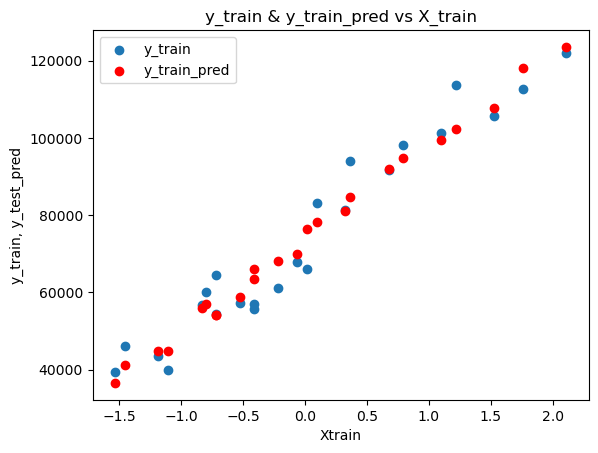

In [84]:
# print(len(X_train))
# print(y_train_pred.size)
# print(X_train["YearsExperience"].values())

# print(type(X_train))
# print(type(y_train))
# print(type(y_train_pred))

# print(X_train[:,3])
# print(y_train)
# print(y_train_pred)

fig, ax = plt.subplots()
ax.set_title("y_train & y_train_pred vs X_train")
ax.set_xlabel("Xtrain")
ax.set_ylabel("y_train, y_test_pred")


_ = ax.scatter(X_train[:,3], y_train)
_ = ax.scatter(X_train[:,3], y_train_pred, c="red")

_ = ax.legend(('y_train', 'y_train_pred'))


### 2.3 Apply model on test set

In [85]:
# Process test set data

# 1.5 - No missing values => No imputer.transform...

# 1.5 - Encoding categorical features and standardizing numeric features
X_test = feature_encoder.transform(X_test)

# 1.5 - No need to encode y labels

In [86]:
# Predictions on test set
# cf 2.1 above
y_test_pred = regressor.predict(X_test)
# print(y_test_pred[:5])

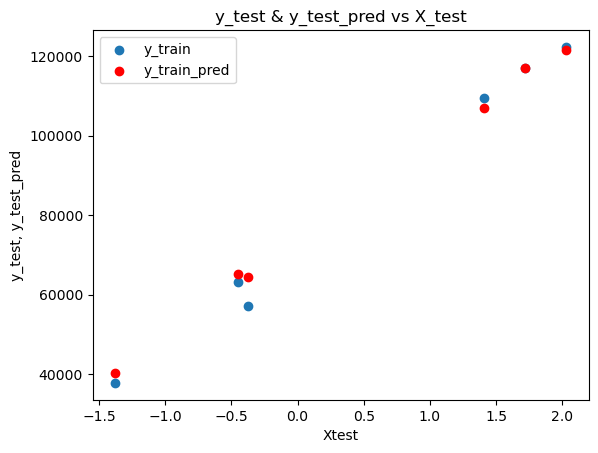

In [87]:
fig, ax = plt.subplots()
ax.set_title("y_test & y_test_pred vs X_test")
ax.set_xlabel("Xtest")
ax.set_ylabel("y_test, y_test_pred")
ax.scatter(X_test[:,3], y_test)
ax.scatter(X_test[:,3], y_test_pred, c="red")
_ = ax.legend(('y_train', 'y_train_pred'))

## Step 3 - Evaluate the model

In [88]:
# Print R^2 scores
print(f"R2 score on training set : {regressor.score(X_train, y_train):.3f}")
print(f"R2 score on test set     : {regressor.score(X_test, y_test):.3f}")

R2 score on training set : 0.947
R2 score on test set     : 0.989


* $R^2$ close to 1 means good performance 
* $R^2_{train}$ > $R^2_{test}$ means overfitting 
* $R^2_{train}$ < $R^2_{test}$ means underfitting 

## Step 4 - Features importance
If you want to interpret coefficients, make sure you NORMALIZED your data in the preprocessing part

In [89]:
categorical_column_names = feature_encoder.transformers_[0][1].categories_
numerical_column_names = X.iloc[:, numeric_features].columns 
all_column_names = np.append(categorical_column_names, numerical_column_names)
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":regressor.coef_
})
print(feature_importance)
print("Constant is      : ", regressor.intercept_)

     feature_names  coefficients
0           France   -290.803965
1          Germany  -2182.158187
2   United-Kingdom   2472.962152
3  YearsExperience  23904.202892
Constant is      :  73498.28163844894


$y=23904\times YearsExperience + 2472 \times UK - 2182 \times GE  -290\times FR + 73498$

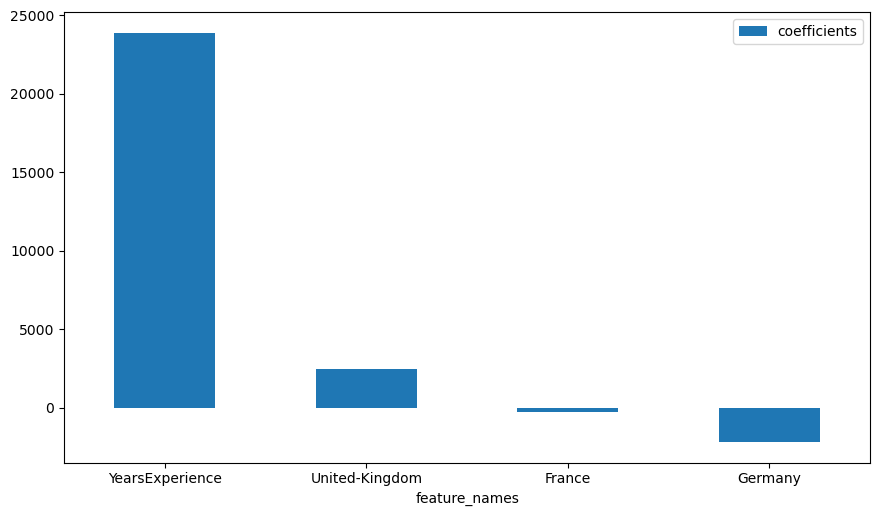

In [90]:
_ = feature_importance.sort_values(by="coefficients", ascending=False).plot(kind="bar", x="feature_names", figsize=(16*.65, 9*.65))
_ = plt.xticks(rotation=0)
